# The Fourier Transform

The 2D discrete Fourier Transform decomposes a 2D array into a sum of complex exponentials:

$$
f(x,y) = \frac{1}{mn} \sum_{u=0}^{m-1} \sum_{v=0}^{n-1} F(u,v)
  \exp \left[2\pi i \left(\frac{xu}{m} + \frac{yv}{n}\right) \right]
$$

where the *Fourier coefficients* are defined by

$$
F(u,v) = \sum_{x=0}^{m-1} \sum_{y=0}^{n-1} f(x,y)
  \exp \left[-2\pi i \left(\frac{xu}{m} + \frac{yv}{n}\right) \right]
$$

They are useful in image processing for performing fast filtering, compression, detection of periodic features, etc.

First let us plot the Fourier coefficients of some simple images:

In [1]:
# Code from previous section
using PyPlot
using Statistics
A = imread("sample_photo.png")
B = mean(A, dims=3)[:,:,1]
function imshow_scale(A)
    # Like imshow(A) but scales the values to [0,1] and supports grayscale
    
    A .-= minimum(A)            # Scale and shift to [0,1]
    A ./= maximum(A)
    if ndims(A) < 3
        A = reshape(A, size(A,1), size(A,2), 1)
    end
    if size(A,3) == 1
        A = repeat(A, 1, 1, 3)  # Set R=G=B for grayscale
    end
    imshow(A)
    end;

In [2]:
# Uncomment below if the package is not already installed
#using Pkg; Pkg.add("FFTW") 

In [3]:
using FFTW

function imagefft_demo(A)
    AF = fftshift(fft(A))
    subplot(1,2,1); imshow_scale(A);
    subplot(1,2,2); imshow_scale(log.(1 .+ abs.(AF)));
    return
end

imagefft_demo (generic function with 1 method)

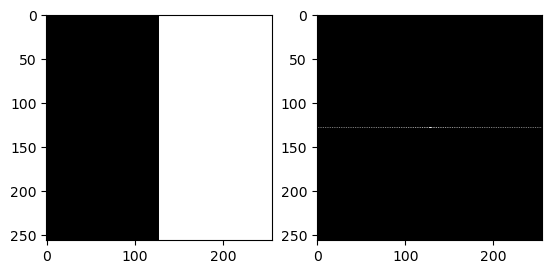

In [4]:
G = [zeros(256,128) ones(256,128)]
imagefft_demo(G)

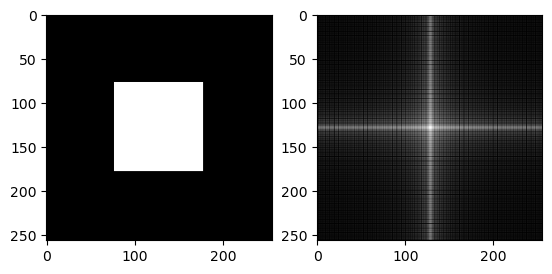

In [5]:
G = zeros(256, 256)
G[78:178, 78:178] .= 1.0
imagefft_demo(G)

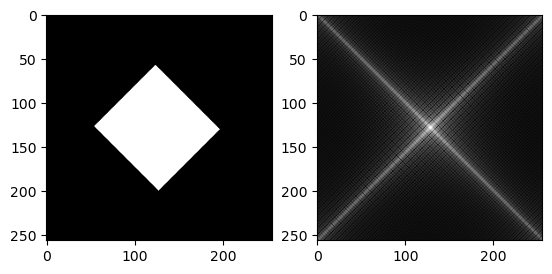

In [6]:
G = Float32[ (i+j<329) && (i+j>182) && (i-j>-67) && (i-j<73) for i = 1:256, j = 1:256 ]
imagefft_demo(G)

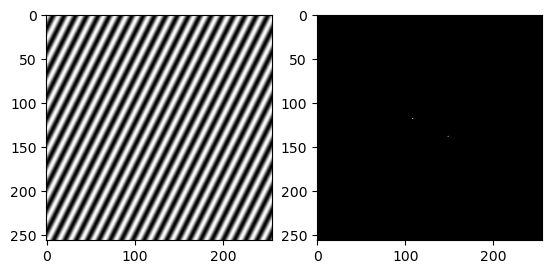

In [7]:
G = Float32[ sin(2pi*(10i + 20j)/256) for i = 1:256, j = 1:256 ]
imagefft_demo(G)

Many of these patterns can be understood from the underlying Fourier expansion. However, for a general image the pattern of the Fourier spectrum is less clear. We would expect the coefficients from a relatively smooth image to decay away from the center though:

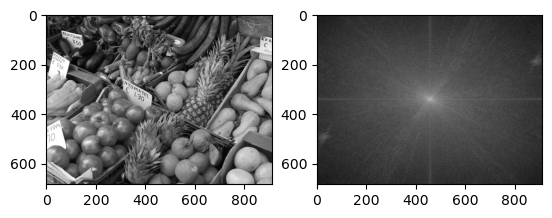

In [8]:
imagefft_demo(B)

### Removing periodic noise

One application of image processing using the Fourier transform is to remove periodic noise. Below we demonstrate this using a made-up example with a given frequency and direction of the noise, but it can be made more general.

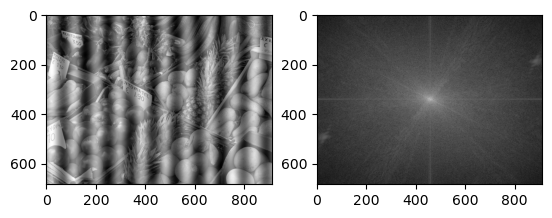

In [9]:
Bpernoise = copy(B)
Bpernoise = B + 0.5*Float32[sin(2π*10j / size(B,2)) for i = 1:size(B,1), j = 1:size(B,2) ]
imagefft_demo(Bpernoise)

Now compute the Fourier transform, and set the (known) noise frequencies to zero:

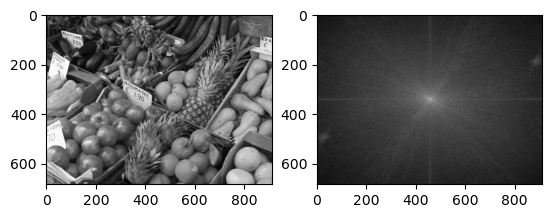

In [10]:
# Filter
BF = fftshift(fft(Bpernoise))
mid = size(B) .÷ 2 .+ 1
BF[mid[1], mid[2] + 10] = 0
BF[mid[1], mid[2] - 10] = 0
Bfiltered = real.(ifft(ifftshift(BF)))

imagefft_demo(Bfiltered)